# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

#### Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [6]:
p = 60/100
q = 40/100

print(f"The probability that the fruit is an apple is {p}.")
print(f"The probability that the fruit is an orange is {q}.")

The probability that the fruit is an apple is 0.6.
The probability that the fruit is an orange is 0.4.


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [17]:
# Probability of a single fruit being an apple
p = 60 / 100  # or 0.6

# Probability that the first five fruits are apples
first_five_p = p**5
print(f"The probability that the first five fruits are apples is {first_five_p:.4f} or {first_five_p:.2%}.")

# Probability of a single fruit being an orange
q = 40 / 100  # or 0.4

# Probability that the first five fruits are apples and the next 15 are oranges
first_five_p_and_next_fifteen_q = first_five_p * (q**15)
print(f"The probability that the first five fruits are apples and the next 15 are oranges is {first_five_p_and_next_fifteen_q:.4f} or {first_five_p_and_next_fifteen_q:.2%}.")


The probability that the first five fruits are apples is 0.0778 or 7.78%.
The probability that the first five fruits are apples and the next 15 are oranges is 0.0000 or 0.00%.


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [20]:
import math

# Parameters
n = 20          # Total number of trials
x = 5           # Number of apples picked (successes)
p = 0.6         # Probability of picking an apple
q = 1 - p       # Probability of picking an orange

# Calculate the binomial coefficient (n choose x)
binomial_coeff = math.factorial(n) / (math.factorial(x) * math.factorial(n - x))

# Calculate the probability
probability = binomial_coeff * (p**x) * (q**(n - x))

print(f"The probability of getting {x} apples and {n - x} oranges is {probability:.4f} or {probability:.2%}.")


The probability of getting 5 apples and 15 oranges is 0.0013 or 0.13%.


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [6]:
import math

# Parameters
n = 20          # Total trials
p = 0.6         # Probability of picking an apple
q = 1 - p       # Probability of picking an orange

# Function to calculate binomial probability
def binomial_pmf(k, n, p):
    binomial_coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return binomial_coeff * (p**k) * (q**(n - k))

# Sum probabilities for X = 0 to X = 4
prob_less_than_5 = sum(binomial_pmf(k, n, p) for k in range(5))
print(f"The probability of picking less than 5 apples is {prob_less_than_5:.4f} or {prob_less_than_5:.2%}.")


The probability of picking less than 5 apples is 0.0003 or 0.03%.


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

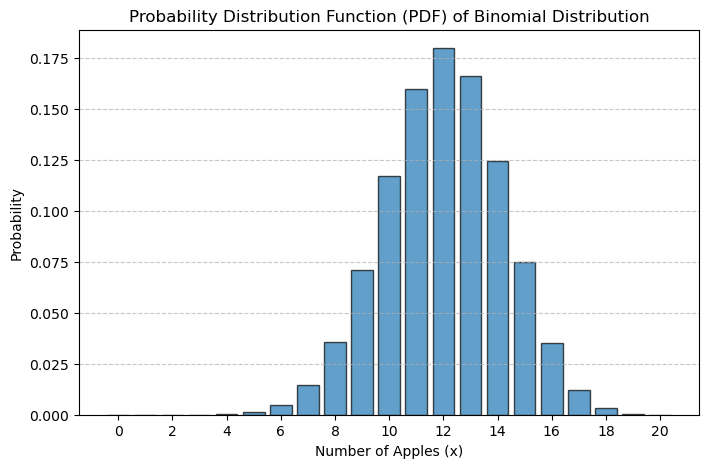

In [8]:
import matplotlib.pyplot as plt
import math

# Parameters
n = 20          # Total number of trials
p = 0.6         # Probability of success (picking an apple)
q = 1 - p       # Probability of failure

# Function to calculate binomial PMF
def binomial_pmf(k, n, p):
    binomial_coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return binomial_coeff * (p**k) * (q**(n - k))

# Range of x values (0 to n)
x = range(n + 1)

# Calculate PDF for each value of x
pdf = [binomial_pmf(k, n, p) for k in x]

# Plot the PDF
plt.figure(figsize=(8, 5))
plt.bar(x, pdf, width=0.8, alpha=0.7, edgecolor='black')
plt.title("Probability Distribution Function (PDF) of Binomial Distribution")
plt.xlabel("Number of Apples (x)")
plt.ylabel("Probability")
plt.xticks(range(0, n + 1, 2))  # Set x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [10]:
import math

# Parameters
lambda_ = 2.3  # Average number of goals per match
k = 5          # Number of goals

# Poisson probability formula
poisson_prob = (lambda_**k * math.exp(-lambda_)) / math.factorial(k)

print(f"The probability of scoring {k} goals in a match is {poisson_prob:.4f} or {poisson_prob:.2%}.")


The probability of scoring 5 goals in a match is 0.0538 or 5.38%.


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

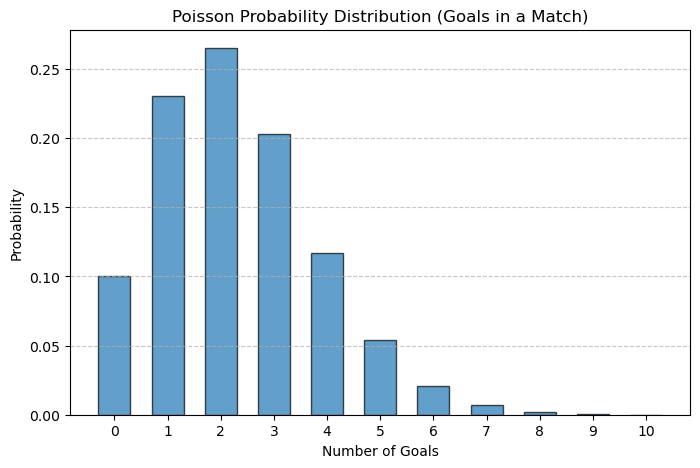

In [12]:
import matplotlib.pyplot as plt
import math

# Parameters
lambda_ = 2.3  # Average number of goals per match
k_values = range(0, 11)  # Number of goals from 0 to 10

# Calculate Poisson probabilities for k = 0 to 10
poisson_probs = [(lambda_**k * math.exp(-lambda_)) / math.factorial(k) for k in k_values]

# Plot the Poisson distribution
plt.figure(figsize=(8, 5))
plt.bar(k_values, poisson_probs, width=0.6, alpha=0.7, edgecolor='black')
plt.title("Poisson Probability Distribution (Goals in a Match)")
plt.xlabel("Number of Goals")
plt.ylabel("Probability")
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
